In [109]:
# Import statements

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [110]:
# Extract data

warnings.filterwarnings("ignore") #removes warning messages
df = pd.read_csv('healthcare-dataset-stroke-data.csv') #imports csv file and second argument puts the data into a table (DF)
df.info() #prints info about each column's data type
df.isnull().sum() #displays number of null values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [111]:
# Pre-processing - data analysis

df.shape #shows the dimensions of the dataset in the form (rows, columns)

(5110, 12)

In [112]:
# Pre-processing - data analysis

df.head() #displays the first 5 entries

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [113]:
# Pre-processing - data analysis

df.tail() #displays the last 5 entries

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [114]:
# Pre-processing - data analysis

df['smoking_status'].unique().tolist() #shows unique values for column smoking_status

['formerly smoked', 'never smoked', 'smokes', 'Unknown']

In [115]:
# Pre-processing - Feature engineering (drop useless columns and null entries)

df.drop(['id'], axis = 1, inplace = True) #drops column ID
df.dropna(inplace = True) #drop NaN rows (rows with no/null values)
df.reset_index(drop = True, inplace = True) #update rows

<AxesSubplot:>

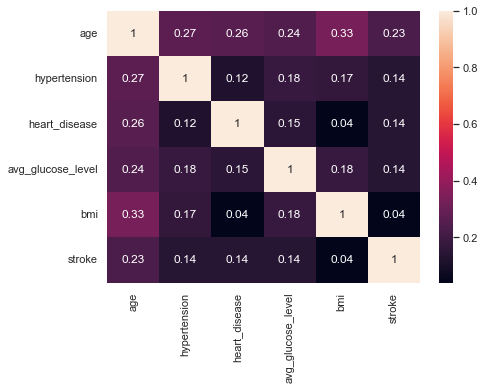

In [116]:
# Pre-processing - data analysis (data visualisation using matrix)

plt.figure(figsize = (7, 5))
correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

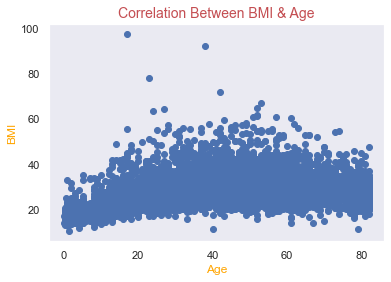

In [117]:
# Pre-processing - data analysis 

plt.scatter(df['age'], df['bmi']) #drop any outliers that are found in the scatter plot
plt.title("Correlation Between BMI & Age", fontsize = 14, color = 'r') #add charts label
plt.xlabel("Age", fontsize = 12, color = 'orange') #adds x-axis label
plt.ylabel("BMI", fontsize = 12, color = 'orange') #adds y-axis label
plt.grid() #adds a grid background

In [118]:
# Pre-processing - data analysis

df[df['age'] >= 80.0] #displays outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
19,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
21,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.5,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4864,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
4870,Male,80.0,0,0,Yes,Self-employed,Urban,120.03,24.3,formerly smoked,0
4873,Male,81.0,0,0,Yes,Private,Rural,135.32,35.8,Unknown,0
4900,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [119]:
# Pre-processing - Feature engineering (drop outliers)

df.drop(df[df.age >= 80.0].index, inplace = True)
df.reset_index(drop = True, inplace = True) #update rows

In [120]:
# Pre-processing - data analysis

df.shape

(4727, 11)

In [121]:
# Pre-processing - Feature engineering (convert columns with categorical values to numeric values)

encoder = OneHotEncoder(drop = 'first', dtype = int) #instantiate encoder that converts our data to int data type

dfn = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']] #creates a subset DF with all the categorical columns we want to convert
dfn = encoder.fit_transform(dfn).toarray() #convert
dfn = pd.DataFrame(dfn) #put converted columns array into new DF
df = pd.concat([df, dfn], axis = 1) #concatenate (join) the newly created DF with original DF

In [122]:
# Pre-procesing - Feature engineering (drop the old text values of specified columns from original DF)

df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1, inplace = True)
df.reset_index(drop = True, inplace = True) #update rows

In [123]:
# Pre-processing - data analysis
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,0,1,2,3,4,5,6,7,8,9,10
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
2,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
3,74.0,1,1,70.09,27.4,1,1,0,1,0,1,0,0,0,0,1,0
4,69.0,0,0,94.39,22.8,1,0,0,0,0,1,0,0,1,0,1,0


Text(0.5, 1.0, 'Age')

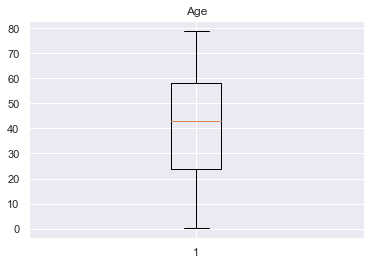

In [124]:
# Pre-processing - data analysis (generate box plot for age column)

plt.boxplot(df['age'])
plt.title('Age')

Text(0.5, 1.0, 'Average Glucose Level')

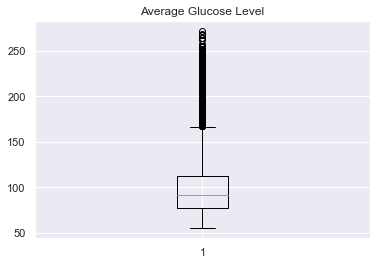

In [125]:
# Pre-processing - data analysis (generate box plot for avg_glucose_level column)

plt.boxplot(df['avg_glucose_level'])
plt.title('Average Glucose Level')

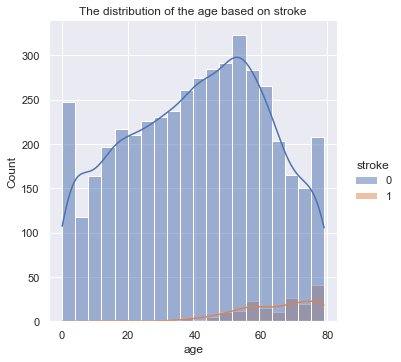

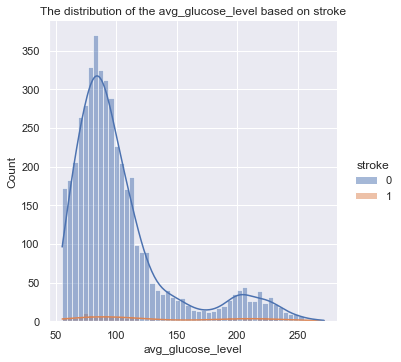

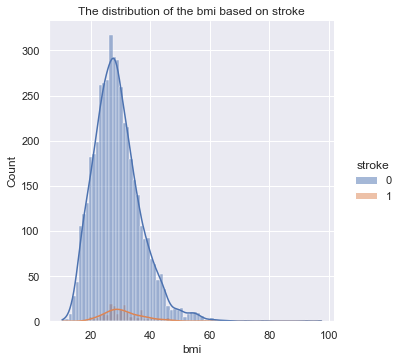

In [126]:
# Pre-processing - data analysis (generate distribution graphs based on stroke)

sns.set_theme(style = 'darkgrid')
for i in df.columns[:-1]: # exclude stroke column
    if df[i].dtype == 'float64':
            sns.displot(data = df, x = i, hue = 'stroke', kde = True)
            plt.title('The distribution of the {} based on stroke'.format(i))
            plt.show()

In [127]:
# Pre-processing - Feature engineering (create DFs for feature and target variables)

target_variable_df = df['stroke'] == 1 #creates a subset of the df by taking the target variable column and converts the 'Yes' and 'No' values to machine-readable Boolean
feature_variable_df =  df.drop('stroke', axis=1) #creates a subset of the df by 'dropping' the stroke (target) column, returning a df of only feature variables

x = feature_variable_df.values
y = target_variable_df.values

In [128]:
# Pre-processing - Feature engineering (train test split & feature scaling)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) #test_size being 0.3 means that 30% of the dataset will be used as test data (and 70% as training data), random_state determines the randomness in which the data is selected for test and training.

scaler = StandardScaler() #instantiate feature scaler, which will standardise our feature variables in a fixed range, improving accuracy
scaler.fit(x) #fit scaler to the feature variable dataset so it learns the parameters
x_train_scaled = scaler.transform(x_train) #scale training feature dataset
x_test_scaled = scaler.transform(x_test) #scale testing feature dataset

In [129]:
# Pre-processing - Feature engineering (check for skewed data)
# The 0 class is over-represented, which could cause the model to undermine the minority class

skewed_data_check = df['stroke']
skewed_data_check.value_counts()

0    4557
1     170
Name: stroke, dtype: int64

<AxesSubplot:ylabel='stroke'>

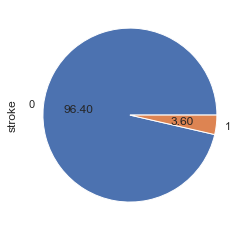

In [130]:
# Pre-processing - Feature engineering (check for skewed data in visual form)

skewed_data_check.value_counts().plot.pie(autopct = '%.2f')

In [131]:
# Pre-processing - Feature engineering (oversampling)

oversampled = SMOTE(random_state=0)
x_train_smote, y_train_smote = oversampled.fit_resample(x_train_scaled, y_train)
#y_train_smote.value_counts()

In [132]:
# Model fitting (training)

LR_model = LogisticRegression(C=0.0006951927961775605, max_iter=5000, penalty='l1',
                   solver='liblinear') #parameters specified as per grid search result
LR_model.fit(x_train_scaled, y_train) #fits and trains the data to the model

LogisticRegression(C=0.0006951927961775605, max_iter=5000, penalty='l1',
                   solver='liblinear')

In [133]:
# Model evaluation (LR) - using confusion matrix and cross validation

y_pred = LR_model.predict(x_test_scaled) #using the scaled predictor x_test_scaled to predict the dependent variable y_train
cm = confusion_matrix(y_test, y_pred) #generates a confusion matrix


print("True Positives:", cm[0][0]) #TP is the same as 'you predicted positive and it's true'
print("False Positives:", cm[0][1]) #FP is the same as 'you predicted positive and it's false'
print("True Negatives:", cm[1][1]) #TN is the same as 'you predicted negative and it's true'
print("False Negatives:", cm[1][0]) #FN is the same as 'you predicted negative and it's false'

score = LR_model.score(x_train_scaled, y_train) #gives an accuracy score of our model based on the fitted data
print("Model has a training score of", round(score * 100, 2), "%.")
score = LR_model.score(x_test_scaled, y_test) #gives an accuracy score of our model based on the fitted data
print("Model has a testing score of", round(score * 100, 2), "%.")

scores = cross_val_score(LR_model, x, y, cv=4)
print(f"Cross validation score: {np.mean(scores.tolist()) * 100}%")
scores

True Positives: 1371
False Positives: 0
True Negatives: 0
False Negatives: 48
Model has a training score of 96.31 %.
Model has a testing score of 96.62 %.
Cross validation score: 96.40364714293288%


array([0.96362098, 0.96362098, 0.96446701, 0.96443692])

<AxesSubplot:>

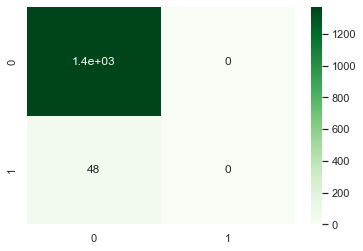

In [134]:
# Model evaluation (LR) - using confusion matrix in visual form

sns.heatmap(cm, cmap = 'Greens', annot = True, xticklabels = [0, 1], yticklabels = [0, 1])

In [135]:
# Model evaluation (LR) - using classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1371
        True       0.00      0.00      0.00        48

    accuracy                           0.97      1419
   macro avg       0.48      0.50      0.49      1419
weighted avg       0.93      0.97      0.95      1419



In [136]:
# Hyperparameter optimisation (LR) - specifying how hyperparameters should be sampled using a dict for optimisation

param_grid = [
    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'C' : np.logspace(-4, 4, 20),
     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter': [100, 1000, 2500, 5000]
    }
]

In [137]:
# Hyperparameter optimisation (LR) - performs a 4 fold cross-validated random search

clf = RandomizedSearchCV(LR_model, param_grid, n_jobs = -1, cv = 4)
hyperparameter_combo = clf.fit(x, y)
hyperparameter_combo.best_estimator_

LogisticRegression(C=0.0018329807108324356, max_iter=5000, solver='saga')

In [138]:
# Model fitting/learning (MLP)

MLP_model = MLPClassifier(activation='identity', alpha=0.05, hidden_layer_sizes=(75,),
              learning_rate='invscaling', solver='lbfgs')
MLP_model.fit(x_train, y_train)

MLPClassifier(activation='identity', alpha=0.05, hidden_layer_sizes=(75,),
              learning_rate='invscaling', solver='lbfgs')

In [139]:
# Model evaluation (MLP) - using confusion matrix and cross validation

y_pred = MLP_model.predict(x_test_scaled) #using the scaled predictor x_test_scaled to predict the dependent variable y_train
cm = confusion_matrix(y_test, y_pred) #generates a confusion matrix


print("True Positives:", cm[0][0]) #TP is the same as 'you predicted positive and it's true'
print("False Positives:", cm[0][1]) #FP is the same as 'you predicted positive and it's false'
print("True Negatives:", cm[1][1]) #TN is the same as 'you predicted negative and it's true'
print("False Negatives:", cm[1][0]) #FN is the same as 'you predicted negative and it's false'

score = MLP_model.score(x_train_scaled, y_train) #gives an accuracy score of our model based on the fitted data
print("Model has a training score of", round(score * 100, 2), "%.")
score = MLP_model.score(x_test_scaled, y_test) #gives an accuracy score of our model based on the fitted data
print("Model has a testing score of", round(score * 100, 2), "%.")

scores = cross_val_score(MLP_model, x, y, cv=4)
print(f"Cross validation score: {np.mean(scores.tolist()) * 100}%")
scores

True Positives: 1371
False Positives: 0
True Negatives: 0
False Negatives: 48
Model has a training score of 96.28 %.
Model has a testing score of 96.62 %.
Cross validation score: 96.40364714293288%


array([0.96362098, 0.96362098, 0.96446701, 0.96443692])

<AxesSubplot:>

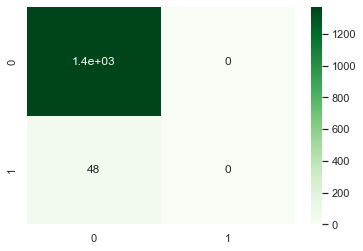

In [140]:
# Model evaluation (MLP) - using confusion matrix

sns.heatmap(cm, cmap = 'Greens', annot = True, xticklabels = [0, 1], yticklabels = [0, 1])

In [141]:
# Model evaluation (MLP) - using classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1371
        True       0.00      0.00      0.00        48

    accuracy                           0.97      1419
   macro avg       0.48      0.50      0.49      1419
weighted avg       0.93      0.97      0.95      1419



In [142]:
# Hyperparameter optimisation (MLP) - specifying how hyperparameters should be sampled using a dict for optimisation

param_grid = [
    
    {
    'hidden_layer_sizes': [(120,), (60,), (100,), (75,), (80,), (85,), (90,)],
    'activation': ['tanh', 'relu', 'identity', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive', 'invscaling']
    }
]

In [143]:
# Hyperparameter optimisation (MLP) - performs a 4 fold cross-validated random search

clf = RandomizedSearchCV(MLP_model, param_grid, n_jobs = -1, cv = 4)
hyperparameter_combo = clf.fit(x, y)
hyperparameter_combo.best_estimator_

MLPClassifier(activation='logistic', alpha=0.05, hidden_layer_sizes=(60,),
              learning_rate='adaptive')

In [144]:
# Model fitting (KNN)

KNN_model = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, p=6) #parameters specified as per grid search result
KNN_model.fit(x_train_scaled, y_train) #fits and trains the data to the model

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, p=6)

In [145]:
# Model evaluation (KNN) - using confusion matrix and cross validation

y_pred = KNN_model.predict(x_test_scaled) #using the scaled predictor x_test_scaled to predict the dependent variable y_train
cm = confusion_matrix(y_test, y_pred) #generates a confusion matrix


print("True Positives:", cm[0][0]) #TP is the same as 'you predicted positive and it's true'
print("False Positives:", cm[0][1]) #FP is the same as 'you predicted positive and it's false'
print("True Negatives:", cm[1][1]) #TN is the same as 'you predicted negative and it's true'
print("False Negatives:", cm[1][0]) #FN is the same as 'you predicted negative and it's false'

score = KNN_model.score(x_train_scaled, y_train) #gives an accuracy score of our model based on the fitted data
print("Model has a training score of", round(score * 100, 2), "%.")
score = KNN_model.score(x_test_scaled, y_test) #gives an accuracy score of our model based on the fitted data
print("Model has a testing score of", round(score * 100, 2), "%.")

scores = cross_val_score(KNN_model, x, y, cv=4)
print(f"Cross validation score: {np.mean(scores.tolist()) * 100}%")
scores

True Positives: 1371
False Positives: 0
True Negatives: 0
False Negatives: 48
Model has a training score of 96.31 %.
Model has a testing score of 96.62 %.
Cross validation score: 96.40364714293288%


array([0.96362098, 0.96362098, 0.96446701, 0.96443692])

<AxesSubplot:>

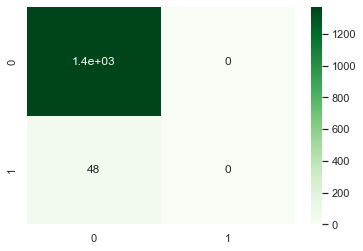

In [146]:
# Model evaluation (KNN) - using confusion matrix

sns.heatmap(cm, cmap = 'Greens', annot = True, xticklabels = [0, 1], yticklabels = [0, 1])

In [147]:
# Model evaluation (KNN) - using classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1371
        True       0.00      0.00      0.00        48

    accuracy                           0.97      1419
   macro avg       0.48      0.50      0.49      1419
weighted avg       0.93      0.97      0.95      1419



In [148]:
# Hyperparameter optimisation (KNN) - specifying how hyperparameters should be sampled using a dict for optimisation

param_grid = [
    
    {'n_neighbors' : [5, 6, 7, 8, 9, 10, 15, 20],
     'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
     'p': [1, 2, 3, 4, 5, 6, 7, 8]
    }
]

In [149]:
# Hyperparameter optimisation (KNN) - performs a 3 fold cross-validated grid search

clf = RandomizedSearchCV(KNN_model, param_grid, n_jobs = -1, cv = 3)
hyperparameter_combo = clf.fit(x, y)
hyperparameter_combo.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=20, p=6)

In [150]:
# Model fitting (NB)

NB_model = MultinomialNB() #parameters specified as per grid search result
NB_model.fit(x_train, y_train) #fits and trains the data to the model

MultinomialNB()

In [151]:
# Model evaluation (NB) - using confusion matrix and cross validation

y_pred = NB_model.predict(x_test_scaled) #using the scaled predictor x_test_scaled to predict the dependent variable y_train
cm = confusion_matrix(y_test, y_pred) #generates a confusion matrix


print("True Positives:", cm[0][0]) #TP is the same as 'you predicted positive and it's true'
print("False Positives:", cm[0][1]) #FP is the same as 'you predicted positive and it's false'
print("True Negatives:", cm[1][1]) #TN is the same as 'you predicted negative and it's true'
print("False Negatives:", cm[1][0]) #FN is the same as 'you predicted negative and it's false'

score = NB_model.score(x_train_scaled, y_train) #gives an accuracy score of our model based on the fitted data
print("Model has a training score of", round(score * 100, 2), "%.")
score = NB_model.score(x_test_scaled, y_test) #gives an accuracy score of our model based on the fitted data
print("Model has a testing score of", round(score * 100, 2), "%.")

scores = cross_val_score(NB_model, x, y, cv=4)
print(f"Cross validation score: {np.mean(scores.tolist()) * 100}%")
scores

True Positives: 1241
False Positives: 130
True Negatives: 17
False Negatives: 31
Model has a training score of 88.39 %.
Model has a testing score of 88.65 %.
Cross validation score: 86.05950318852788%


array([0.84940778, 0.88240271, 0.81725888, 0.89331075])

<AxesSubplot:>

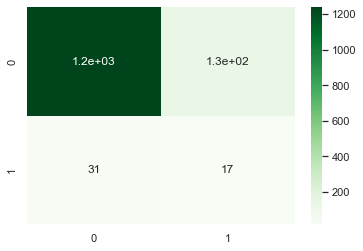

In [152]:
# Model evaluation (NB) - using confusion matrix

sns.heatmap(cm, cmap = 'Greens', annot = True, xticklabels = [0, 1], yticklabels = [0, 1])

In [153]:
# Model evaluation (NB) - using classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.91      0.94      1371
        True       0.12      0.35      0.17        48

    accuracy                           0.89      1419
   macro avg       0.55      0.63      0.56      1419
weighted avg       0.95      0.89      0.91      1419



In [154]:
# Hyperparameter optimisation (NB) - specifying how hyperparameters should be sampled using a dict for optimisation

param_grid = [
    
    {'fit_prior': [True, False]}
]

In [155]:
# Hyperparameter optimisation (NB) - performs a 4 fold cross-validated random search

clf = RandomizedSearchCV(NB_model, param_grid, n_jobs = -1, cv = 3)
hyperparameter_combo = clf.fit(x, y)
hyperparameter_combo.best_estimator_

MultinomialNB()

In [156]:
# Model fitting (SVM)

SVM_model = SVC(C=0.0018329807108324356, break_ties=True, gamma='auto', kernel='sigmoid',
    max_iter=2500, verbose=True) #parameters specified as per grid search result
SVM_model.fit(x_train_scaled, y_train) #fits and trains the data to the model

[LibSVM]

SVC(C=0.0018329807108324356, break_ties=True, gamma='auto', kernel='sigmoid',
    max_iter=2500, verbose=True)

In [157]:
# Model evaluation (SVM) - using confusion matrix and cross validation

y_pred = SVM_model.predict(x_test_scaled) #using the scaled predictor x_test_scaled to predict the dependent variable y_train
cm = confusion_matrix(y_test, y_pred) #generates a confusion matrix


print("True Positives:", cm[0][0]) #TP is the same as 'you predicted positive and it's true'
print("False Positives:", cm[0][1]) #FP is the same as 'you predicted positive and it's false'
print("True Negatives:", cm[1][1]) #TN is the same as 'you predicted negative and it's true'
print("False Negatives:", cm[1][0]) #FN is the same as 'you predicted negative and it's false'

score = SVM_model.score(x_train_scaled, y_train) #gives an accuracy score of our model based on the fitted data
print("Model has a training score of", round(score * 100, 2), "%.")
score = SVM_model.score(x_test_scaled, y_test) #gives an accuracy score of our model based on the fitted data
print("Model has a testing score of", round(score * 100, 2), "%.")

scores = cross_val_score(SVM_model, x, y, cv=4)
print(f"Cross validation score: {np.mean(scores.tolist()) * 100}%")
scores

True Positives: 1371
False Positives: 0
True Negatives: 0
False Negatives: 48
Model has a training score of 96.31 %.
Model has a testing score of 96.62 %.
[LibSVM][LibSVM][LibSVM][LibSVM]Cross validation score: 96.40364714293288%


array([0.96362098, 0.96362098, 0.96446701, 0.96443692])

<AxesSubplot:>

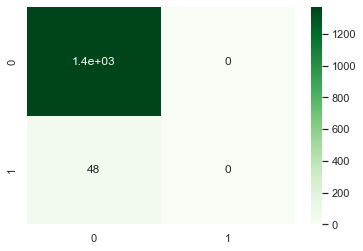

In [158]:
# Model evaluation (SVM) - using confusion matrix

sns.heatmap(cm, cmap = 'Greens', annot = True, xticklabels = [0, 1], yticklabels = [0, 1])

In [159]:
# Model evaluation (SVM) - using classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1371
        True       0.00      0.00      0.00        48

    accuracy                           0.97      1419
   macro avg       0.48      0.50      0.49      1419
weighted avg       0.93      0.97      0.95      1419



In [160]:
# Hyperparameter optimisation (SVM) - specifying how hyperparameters should be sampled using a dict for optimisation

param_grid = [
    
    {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
     'C' : np.logspace(-4, 4, 20),
     'gamma': ['scale', 'auto'],
     'max_iter': [-1, 100, 1000, 2500, 5000],
     'shrinking': [True, False],
     'probability': [True, False],
     'verbose': [True, False],
     'decision_function_shape': ['ovo', 'ovr'],
     'break_ties': [True, False]
    }
]

In [161]:
# Hyperparameter optimisation (SVM) - performs a 4 fold cross-validated random search

clf = RandomizedSearchCV(SVM_model, param_grid, n_jobs = -1, cv = 3)
hyperparameter_combo = clf.fit(x, y)
hyperparameter_combo.best_estimator_

SVC(C=0.08858667904100823, break_ties=True, probability=True, shrinking=False)